# Support Vector Machines (SVM)

In this notebook, I will:
- Learn what an SVM does  
- Visualise how it separates data using margins  
- Train linear and non-linear SVMs  
- Compare results with previous models (e.g. Decision Tree, Random Forest)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay


In [ ]:
# Load the Iris dataset
data = load_iris()
X = data.data
y = data.target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])


Training samples: 120
Testing samples: 30


In [ ]:
# Create and train a linear SVM
svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train, y_train)

# Predictions
y_pred_linear = svm_linear.predict(X_test)

# Accuracy
acc_linear = accuracy_score(y_test, y_pred_linear)
print(f"Linear SVM Accuracy: {acc_linear:.2f}")


Linear SVM Accuracy: 1.00


=== Linear SVM Classification Report ===
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



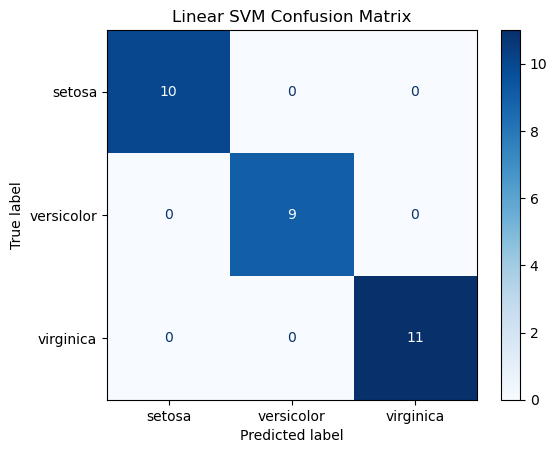

In [ ]:
print("=== Linear SVM Classification Report ===")
print(classification_report(y_test, y_pred_linear, target_names=data.target_names))

ConfusionMatrixDisplay.from_estimator(svm_linear, X_test, y_test, display_labels=data.target_names, cmap="Blues")
plt.title("Linear SVM Confusion Matrix")
plt.show()


In [ ]:
# Create and train a non-linear SVM (RBF kernel)
svm_rbf = SVC(kernel='rbf', gamma='scale', random_state=42)
svm_rbf.fit(X_train, y_train)

# Predictions
y_pred_rbf = svm_rbf.predict(X_test)

# Accuracy
acc_rbf = accuracy_score(y_test, y_pred_rbf)
print(f"RBF SVM Accuracy: {acc_rbf:.2f}")


RBF SVM Accuracy: 1.00


In [ ]:
print("=== Linear SVM ===")
print(classification_report(y_test, y_pred_linear, target_names=data.target_names))

print("\n=== RBF (Non-Linear) SVM ===")
print(classification_report(y_test, y_pred_rbf, target_names=data.target_names))


=== Linear SVM ===
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


=== RBF (Non-Linear) SVM ===
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



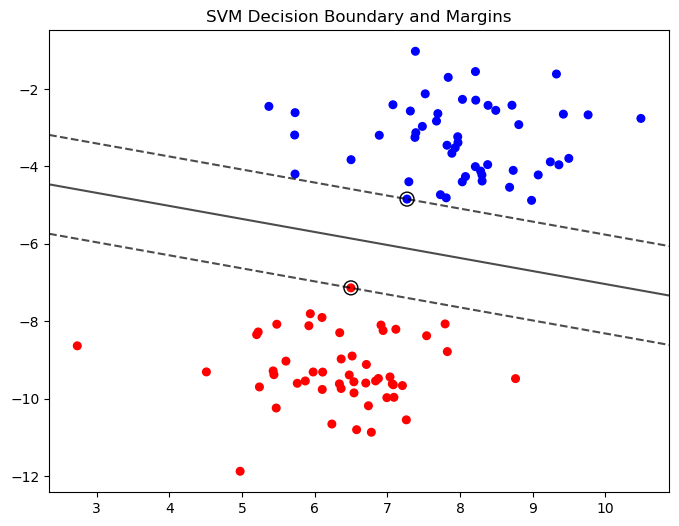

In [ ]:
from sklearn.datasets import make_blobs

# Create a simple 2D dataset
X_vis, y_vis = make_blobs(n_samples=100, centers=2, random_state=6)

# Fit linear SVM
svm_vis = SVC(kernel='linear')
svm_vis.fit(X_vis, y_vis)

# Plot decision boundary
plt.figure(figsize=(8,6))

# Plot points
plt.scatter(X_vis[:,0], X_vis[:,1], c=y_vis, cmap='bwr', s=30)

# Plot separating hyperplane
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm_vis.decision_function(xy).reshape(XX.shape)

# Decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.7,
           linestyles=['--', '-', '--'])

# Support vectors
ax.scatter(svm_vis.support_vectors_[:,0], svm_vis.support_vectors_[:,1],
           s=100, linewidth=1, facecolors='none', edgecolors='k')

plt.title("SVM Decision Boundary and Margins")
plt.show()


## ⚙️ How SVM Works
- SVM finds the **best boundary (hyperplane)** that separates classes with the **maximum margin**.
- The closest points to the boundary are called **support vectors**.
- The **margin** is the distance between the boundary and these support vectors.

### 🧩 Types of Kernels:
| Kernel | Description | Example Use |
|---------|--------------|--------------|
| `linear` | Straight line boundary | Linearly separable data |
| `poly` | Polynomial curved boundary | Moderate non-linear data |
| `rbf` | Gaussian (round) boundary | Complex non-linear data |
| `sigmoid` | S-shaped boundary | Rarely used today |

- `C` controls how strict the margin is (smaller C = wider margin, more tolerance for errors)
- `gamma` controls how far the influence of a single sample reaches (larger = more complex boundary)


In [ ]:
# Try tuning C and gamma
params = [(0.1, 0.1), (1, 1), (10, 0.1), (10, 10)]
results = []

for C, gamma in params:
    model = SVC(kernel='rbf', C=C, gamma=gamma, random_state=42)
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    results.append((C, gamma, acc))

pd.DataFrame(results, columns=['C', 'Gamma', 'Accuracy'])


Summary

| Concept | Description |
|----------|-------------|
| Algorithm | Support Vector Machine |
| Type | Supervised Classification |
| Key Idea | Finds hyperplane with maximum margin |
| Key Parameters | kernel, C, gamma |
| Strengths | Works well in high dimensions, robust |
| Weaknesses | Slower on large datasets, hard to interpret |

 Linear SVMs are great for simple problems,  
 Non-linear (RBF) kernels handle complex, curved boundaries.
